# Project: Brazilian Medical Appointments Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in  each row 
#### PatientId
#### AppointmentID
#### Gender
#### Age
#### Neighbourhood
#### ScheduledDay
#### Scholarship
#### Hipertension
#### Diabetes
#### Alcoholism
#### Handcap
#### SMS_received
#### No-show
---------------------------------

### we could try to ask many questions here :
##### does recieving a SMS resuled more paitients to show in the scheduled day ? 
##### does Alcoholisim affect people showing in the scheduled day ?
##### does hipertension affect paitient show rate ? 
##### does diabetes affect paitient show rate ? 
##### what is the show rate of paitients with handcaps ?
---------------------------

### the most important four question are :
##### what are the distribution of the age in each gender? 
##### does a specific gender have a higher show rate ? 
##### what are the neighbourhoods that paitients like to show in it ?
##### does people with Scholarship show more ?
##### is there any day of the week that had a significant show rate ?


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.tail(5)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


### Data Cleaning (removing negative age , remapping "No-show" and datetiming Scheduled day & dealing with duplicated rows )

#### removing negative age

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
neg_age_mask = df.Age > 0.0 # masking the negative ages out
df = df[neg_age_mask] #subsetting the positive ages only

#### remapping "No-show" assigning 1 to No and 0 to Yes so data could be more understood

In [10]:
mapping = {"No" : 1 , "Yes" : 0} #creating the mapping dictionary
df['No-show'] = df['No-show'].map(mapping).astype('int') #remapping the no-show column to the new values then coverting to intgers
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


#### changing Scheduled day to datetime datatype

In [11]:
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay) #coverting ScheduledDay to datetime
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1


#### checking for duplicated rows

In [12]:
np.sum(df.duplicated())

0

#### checking for missing values

In [13]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


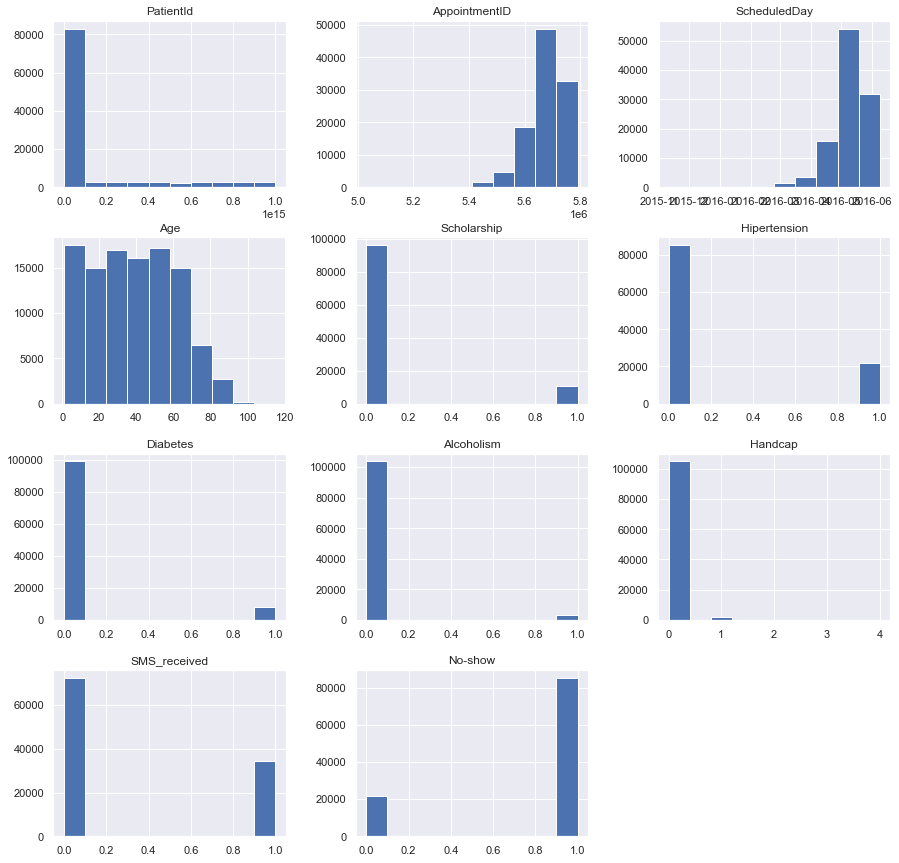

In [14]:
sns.set() #setting the default seaborn style
df.hist(figsize = (15,15)) ; # a general picture

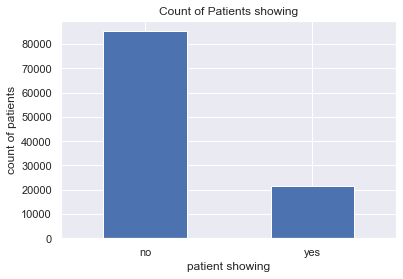

In [21]:
sns.set() # setting default seaborn style
df['No-show'].value_counts().plot(kind = 'bar')  ; #count of the people showed and the ones who didn't 
plt.xlabel('patient showing'); #labeling x-axis
plt.ylabel('count of patients'); #labeling y-axis
plt.xticks([1,0] , ['yes','no'] ,rotation = 0); #replacing x-axis ticks with more appropriate ones
plt.title('Count of Patients showing'); #titling the plot
plt.show()

### Defining function barplot_showrate : plots a bar plot of the show rate of a certain attribute of the data

In [16]:
def barplot_showrate(attribute) : #Defining function barplot_showrate takes one arguement : attribute
    """" plots a bar plot of the show rate of a certain attribute of the data """
    groupby = df.groupby(attribute)['No-show'].mean()#group by the each value of attibute then calculate the mean of the corresponding No-Values 
    sns.set() #setting default seaborn style
    groupby.plot(kind = 'bar'); #plotting a bar plot of the show ratio of each value of the attribute 
    plt.xlabel(attribute) #label the x-axis
    plt.ylabel('show ratio') #label the y-axis
    plt.title('show rate of {}'.format(attribute)) #title of the plot
    return plt.show() #return the plot and show it

### what are the distribution of the age in each gender?

In [17]:
females = df.query('Gender == "F"') #filtering the females only
males = df.query('Gender == "M"') #filtering the males only

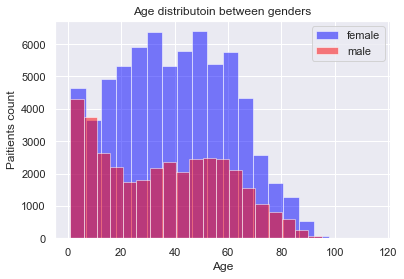

In [22]:
sns.set()
plt.hist(females.Age , alpha = 0.5 , bins = 20 , color = 'blue' , label = 'female') ; #plotting female ages
plt.hist(males.Age , alpha = 0.5 , bins = 20 , color = 'red', label = 'male') ; #plotting male ages
plt.xlabel('Age') ; #lableling x - axis
plt.ylabel('Paitients count') ; #lableling y - axis
plt.title('Age distributoin between genders') #titling the plot
plt.legend() #adding a legend to the plot
plt.show()

#### comment : most male patients are in early 10s and 20s , in the other hand most female patients are in mid-range ages

### does recieving a SMS resuled more paitients to show in the scheduled day ?

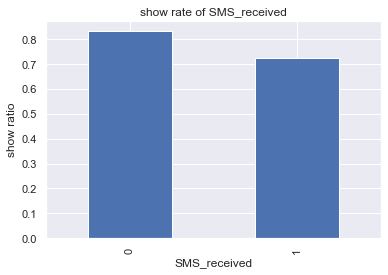

In [23]:
barplot_showrate('SMS_received') ;

#### comment : SMS seems like didn't affect the show rate

### does a specific gender have a higher show rate ?


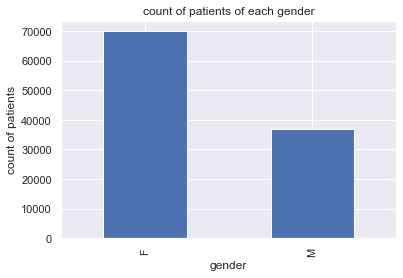

In [24]:
df['Gender'].value_counts().plot(kind = 'bar') ; #creating a plot for count of patients of each gender
plt.xlabel('gender'); #labeling x-axis
plt.ylabel('count of patients') ; #labeling y-axis
plt.title('count of patients of each gender'); #titling the plot
plt.show()

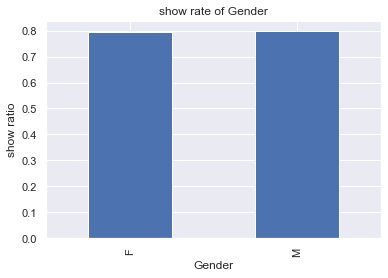

In [25]:
barplot_showrate('Gender') ;

#### comment :despite having a much larger number of female paitients than males there is no specific gender tend to have a show rate more than the other

### does Alcoholisim affect people showing in the scheduled day ?

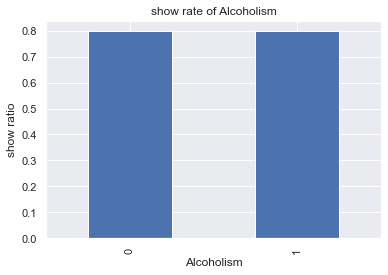

In [26]:
barplot_showrate('Alcoholism') ;

#### comment : it seems like alcoholic and non-alcoholic paitients have the same show rate

### what are the neighbourhoods that paitients like to show in it ?

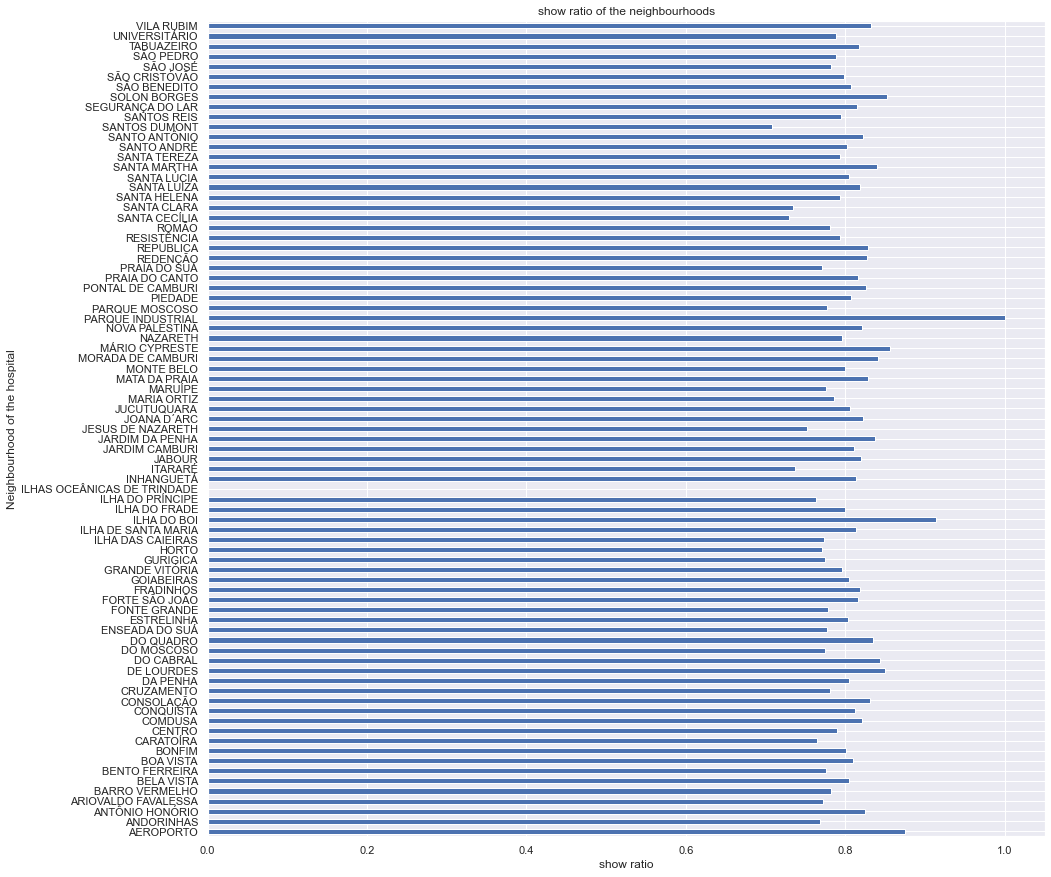

In [27]:
df.groupby('Neighbourhood')['No-show'].mean().plot(kind = 'barh' , figsize = (15,15)) ; #grouping by neighbourhood getting it's show ratio and ploting
plt.xlabel('show ratio'); #label the x-axis
plt.ylabel('Neighbourhood of the hospital'); #label the y-axis
plt.title('show ratio of the neighbourhoods'); #titling the plot
plt.show()

#### comment : it seems like the neighbourhood of "PARQUE INDUSTRIAL" have substantial show rate aproaching 100% , neighbourhood of "ILHAS OCEANICAS DE TRINDADE" have a zero show rate  . other than that , rest of the neighbourhoods have a close show rate of 80% . 

### does hipertension affect paitient show rate ?

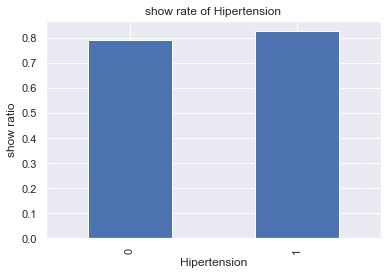

In [28]:
barplot_showrate('Hipertension') ;

#### comment : show rate of people with hipertension is more than people without , but not by much

### does diabetes affect paitient show rate ?

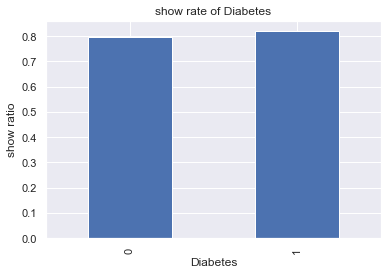

In [29]:
barplot_showrate('Diabetes') ;

#### comment : show rate of people with Diabetes is more than people without , but not by much

### what are the show rate of paitients with handcaps ?

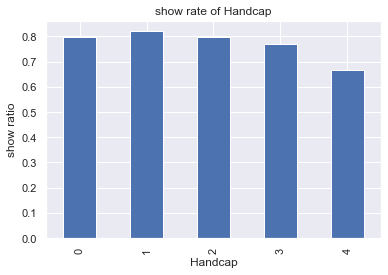

In [30]:
barplot_showrate('Handcap') ;

In [31]:
df.Handcap.value_counts()

0    104747
1      2041
2       183
3        13
4         3
Name: Handcap, dtype: int64

#### comment : it seems like there had been no relation between show rate and number of handcaps

### does people with Scholarship show more ?

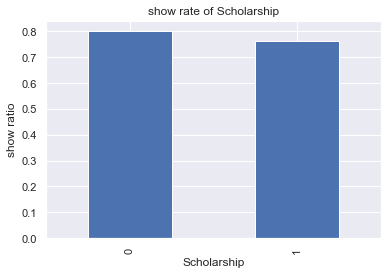

In [32]:
barplot_showrate('Scholarship') ;

#### comment : it seems like there had been no relation between show rate and having a Scholarship

### is there any day of the week that had a significant show rate ?

In [33]:
df['day_of_week'] = df.ScheduledDay.dt.day_name() #creating a new column that stores the corresponding day name in the week of each Scheduled day 

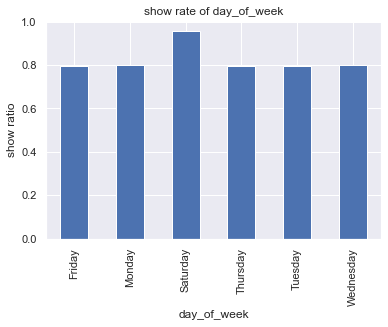

In [34]:
barplot_showrate('day_of_week') ;

#### comment : it seems like paitients showed more when they had a Scheduled day in Saturday , which is a weekend in brazil 

<a id='conclusions'></a>
## Conclusions
### Data wrangling :
#### general properties : importing the data and taking a first glance at it , printing some statistical summries and looking at the data types of the attributes of the data , the data looked almost pretty clean with no missing values or duplicated records , but there were a few fixes needed to be done .
#### data cleaning : this stage were done in three stages , started by dropping any negative age value using masking , second by remapping the 'No-show' column to new numeric values zero and one , so we can do math operations on it , then converting it to integer type , last by changing the data type of the 'ScheduledDay' column ,so we can do date and time explorations.
### EDA :
#### in this stage i started by taking a general graphical look of all possible data attributes using histogram , seeing high paitient show rate in general , and paitient age of one year going as far as 115 years of age .
#### going into the asking questions stage it seemed like i will use the bar plot forever , because there were almost no continuous variables so i defined a function with one argument to draw bar plots of attributes of the data.

#### Questions and explorations :
##### what are the distribution of the age in each gender? most male patients are in early 10s and 20s , in the other hand most female patients are in mid-range ages .
##### does recieving a SMS resuled more paitients to show in the scheduled day ?  SMS seems like didn't affect the show rate .
##### does a specific gender have a higher show rate ? despite having a much larger number of female paitients than males there is no specific gender tend to have a show rate more than the other .
##### does Alcoholisim affect people showing in the scheduled day ? it seems like alcoholic and non-alcoholic paitients have the same show rate .
##### what are the neighbourhoods that paitients like to show in it ?  it seems like the neighbourhood of "PARQUE INDUSTRIAL" have substantial show rate aproaching 100% , neighbourhood of "ILHAS OCEANICAS DE TRINDADE" have a zero show rate  . other than that , rest of the neighbourhoods have a close show rate of 80% . 
##### does hipertension affect paitient show rate ? show rate of people with hipertension is more than people without , but not by much .
##### does diabetes affect paitient show rate ? show rate of people with Diabetes is more than people without , but not by much¶.
##### what are the show rate of paitients with handcaps ? it seems like there had been no relation between show rate and number of handcaps .
##### does people with Scholarship show more ?it seems like there had been no relation between show rate and having a Scholarship
##### is there any day of the week that had a significant show rate ?  it seems like paitients showed more when they had a Scheduled day in Saturday , which is a weekend in brazil
### Limitations : 
##### almost all variables are boolean categorical variables which couldn't be used to find correlations .
##### we used descriptive statistics not inferential , so we didn't had any hypothesis or infrences with our data .

 